In [1]:
import numpy as np
import matplotlib.pyplot as plt
from starfish.cmb.power import C_ell_w0wacdm,get_noise

In [2]:
from starfish.set import settings
settings.cosmo_value

[0.32, 0.049, 0.67, 0.96, 0.81, 0.06, 3.044, 0.054, -1, 0]

In [3]:
ell=np.arange(3000+1)
pars,res,cls=C_ell_w0wacdm(*settings.cosmo_value)
N_T,N_P=get_noise()

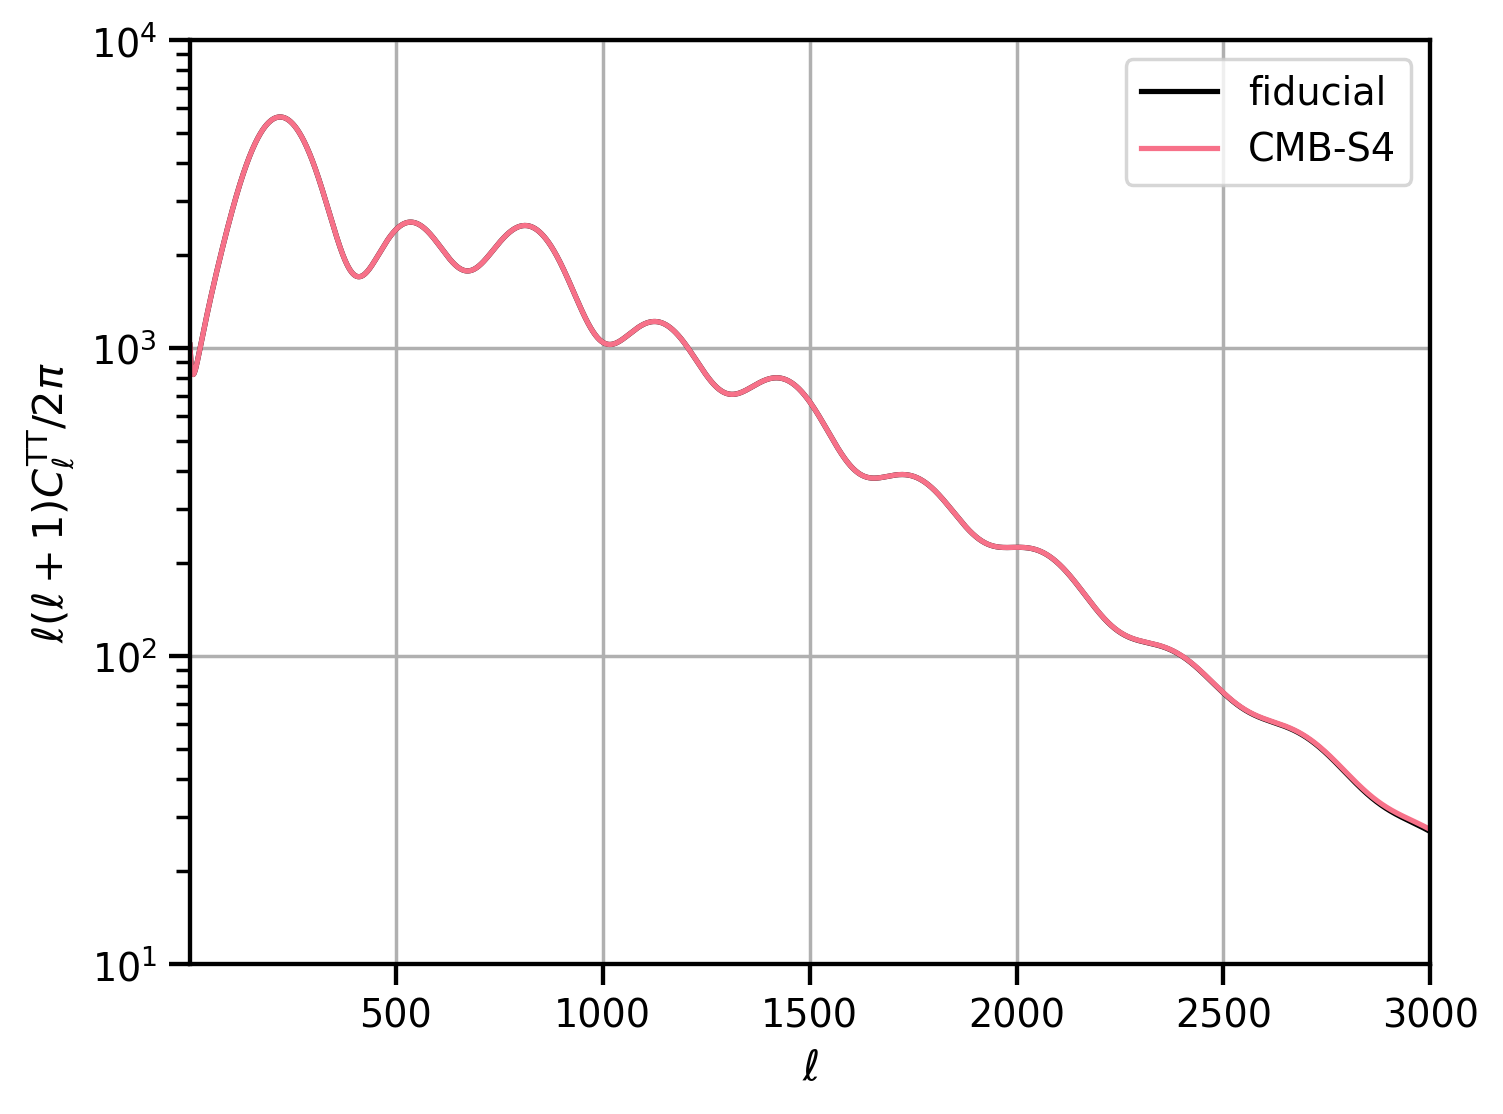

In [4]:
fig,axes=plt.subplots()
fig.set_dpi(250)
axes.semilogy(ell,cls[:,0]*ell*(ell+1)/(2*np.pi),c='k',label='fiducial')
axes.semilogy(ell,(cls[:,0]+N_T)*ell*(ell+1)/(2*np.pi),label=settings.label)
axes.set_xlim(3,3000)
axes.grid()
axes.set_ylabel(r'$\ell(\ell+1)C^\mathrm{TT}_\ell/2\pi$')
axes.set_xlabel(r'$\ell$')
axes.set_ylim(10,1e4)
axes.legend()

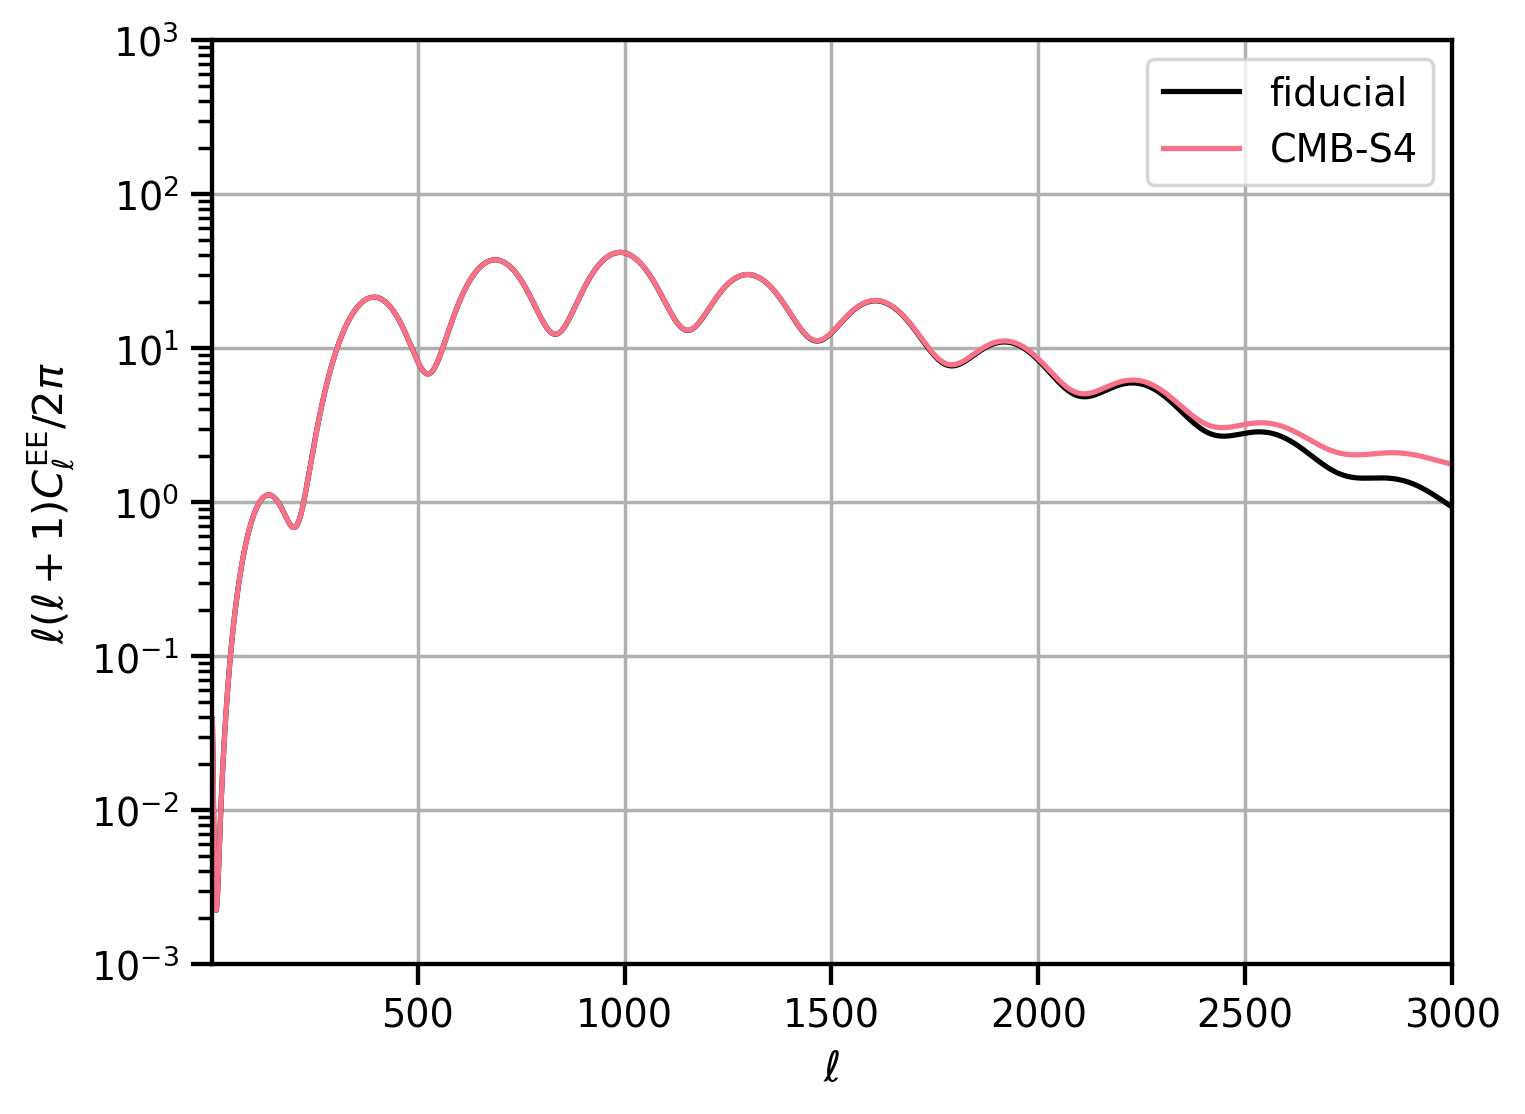

In [5]:
fig,axes=plt.subplots()
fig.set_dpi(250)
axes.semilogy(ell,cls[:,1]*ell*(ell+1)/(2*np.pi),c='k',label='fiducial')
axes.semilogy(ell,(cls[:,1]+N_P)*ell*(ell+1)/(2*np.pi),label=settings.label)
axes.set_xlim(3,3000)
axes.grid()
axes.set_ylabel(r'$\ell(\ell+1)C^\mathrm{EE}_\ell/2\pi$')
axes.set_xlabel(r'$\ell$')
axes.set_ylim(1e-3,1e3)
axes.legend()

In [6]:
from starfish.cmb.fisher import get_fisher
fisher=get_fisher(lcdm=False)

process started!
fiducial values:
-- omega_m0: 0.3200000900104817
-- omega_b0: 0.049
--        h: 0.67
--      n_s: 0.96
--  sigma_8: 0.8100000000000013
--     m_nu: 0.06000375968353048
--    N_eff: 3.0440000000000005
--      tau: 0.054
--       w0: -1.0
--       wa: 0.0
calculating partial derivatives w.r.t cosmological parameters...
(01/20) a power spectrum of one set of parameters done!
(02/20) a power spectrum of one set of parameters done!
(03/20) a power spectrum of one set of parameters done!
(04/20) a power spectrum of one set of parameters done!
(05/20) a power spectrum of one set of parameters done!
(06/20) a power spectrum of one set of parameters done!
(07/20) a power spectrum of one set of parameters done!
(08/20) a power spectrum of one set of parameters done!
(09/20) a power spectrum of one set of parameters done!
(10/20) a power spectrum of one set of parameters done!
(11/20) a power spectrum of one set of parameters done!
(12/20) a power spectrum of one set of paramete

In [7]:
import pandas as pd
cov=pd.DataFrame(np.linalg.inv(fisher.values),index=fisher.index,columns=fisher.columns)

In [8]:
name_width=max([len(v) for v in settings.var_name])
error_dict=dict(zip(settings.var_name,np.sqrt(np.diag(cov.values))))
print('1-sigma errors:')
for key in error_dict.keys():
    print(f'-- {key.rjust(name_width)}: {error_dict[key]:.1e}')

1-sigma errors:
-- omega_m0: 7.8e-02
-- omega_b0: 1.2e-02
--        h: 8.1e-02
--      n_s: 4.8e-03
--  sigma_8: 7.0e-02
--     m_nu: 4.2e-01
--    N_eff: 7.2e-02
--      tau: 1.3e-01
--       w0: 2.2e+00
--       wa: 7.6e+00


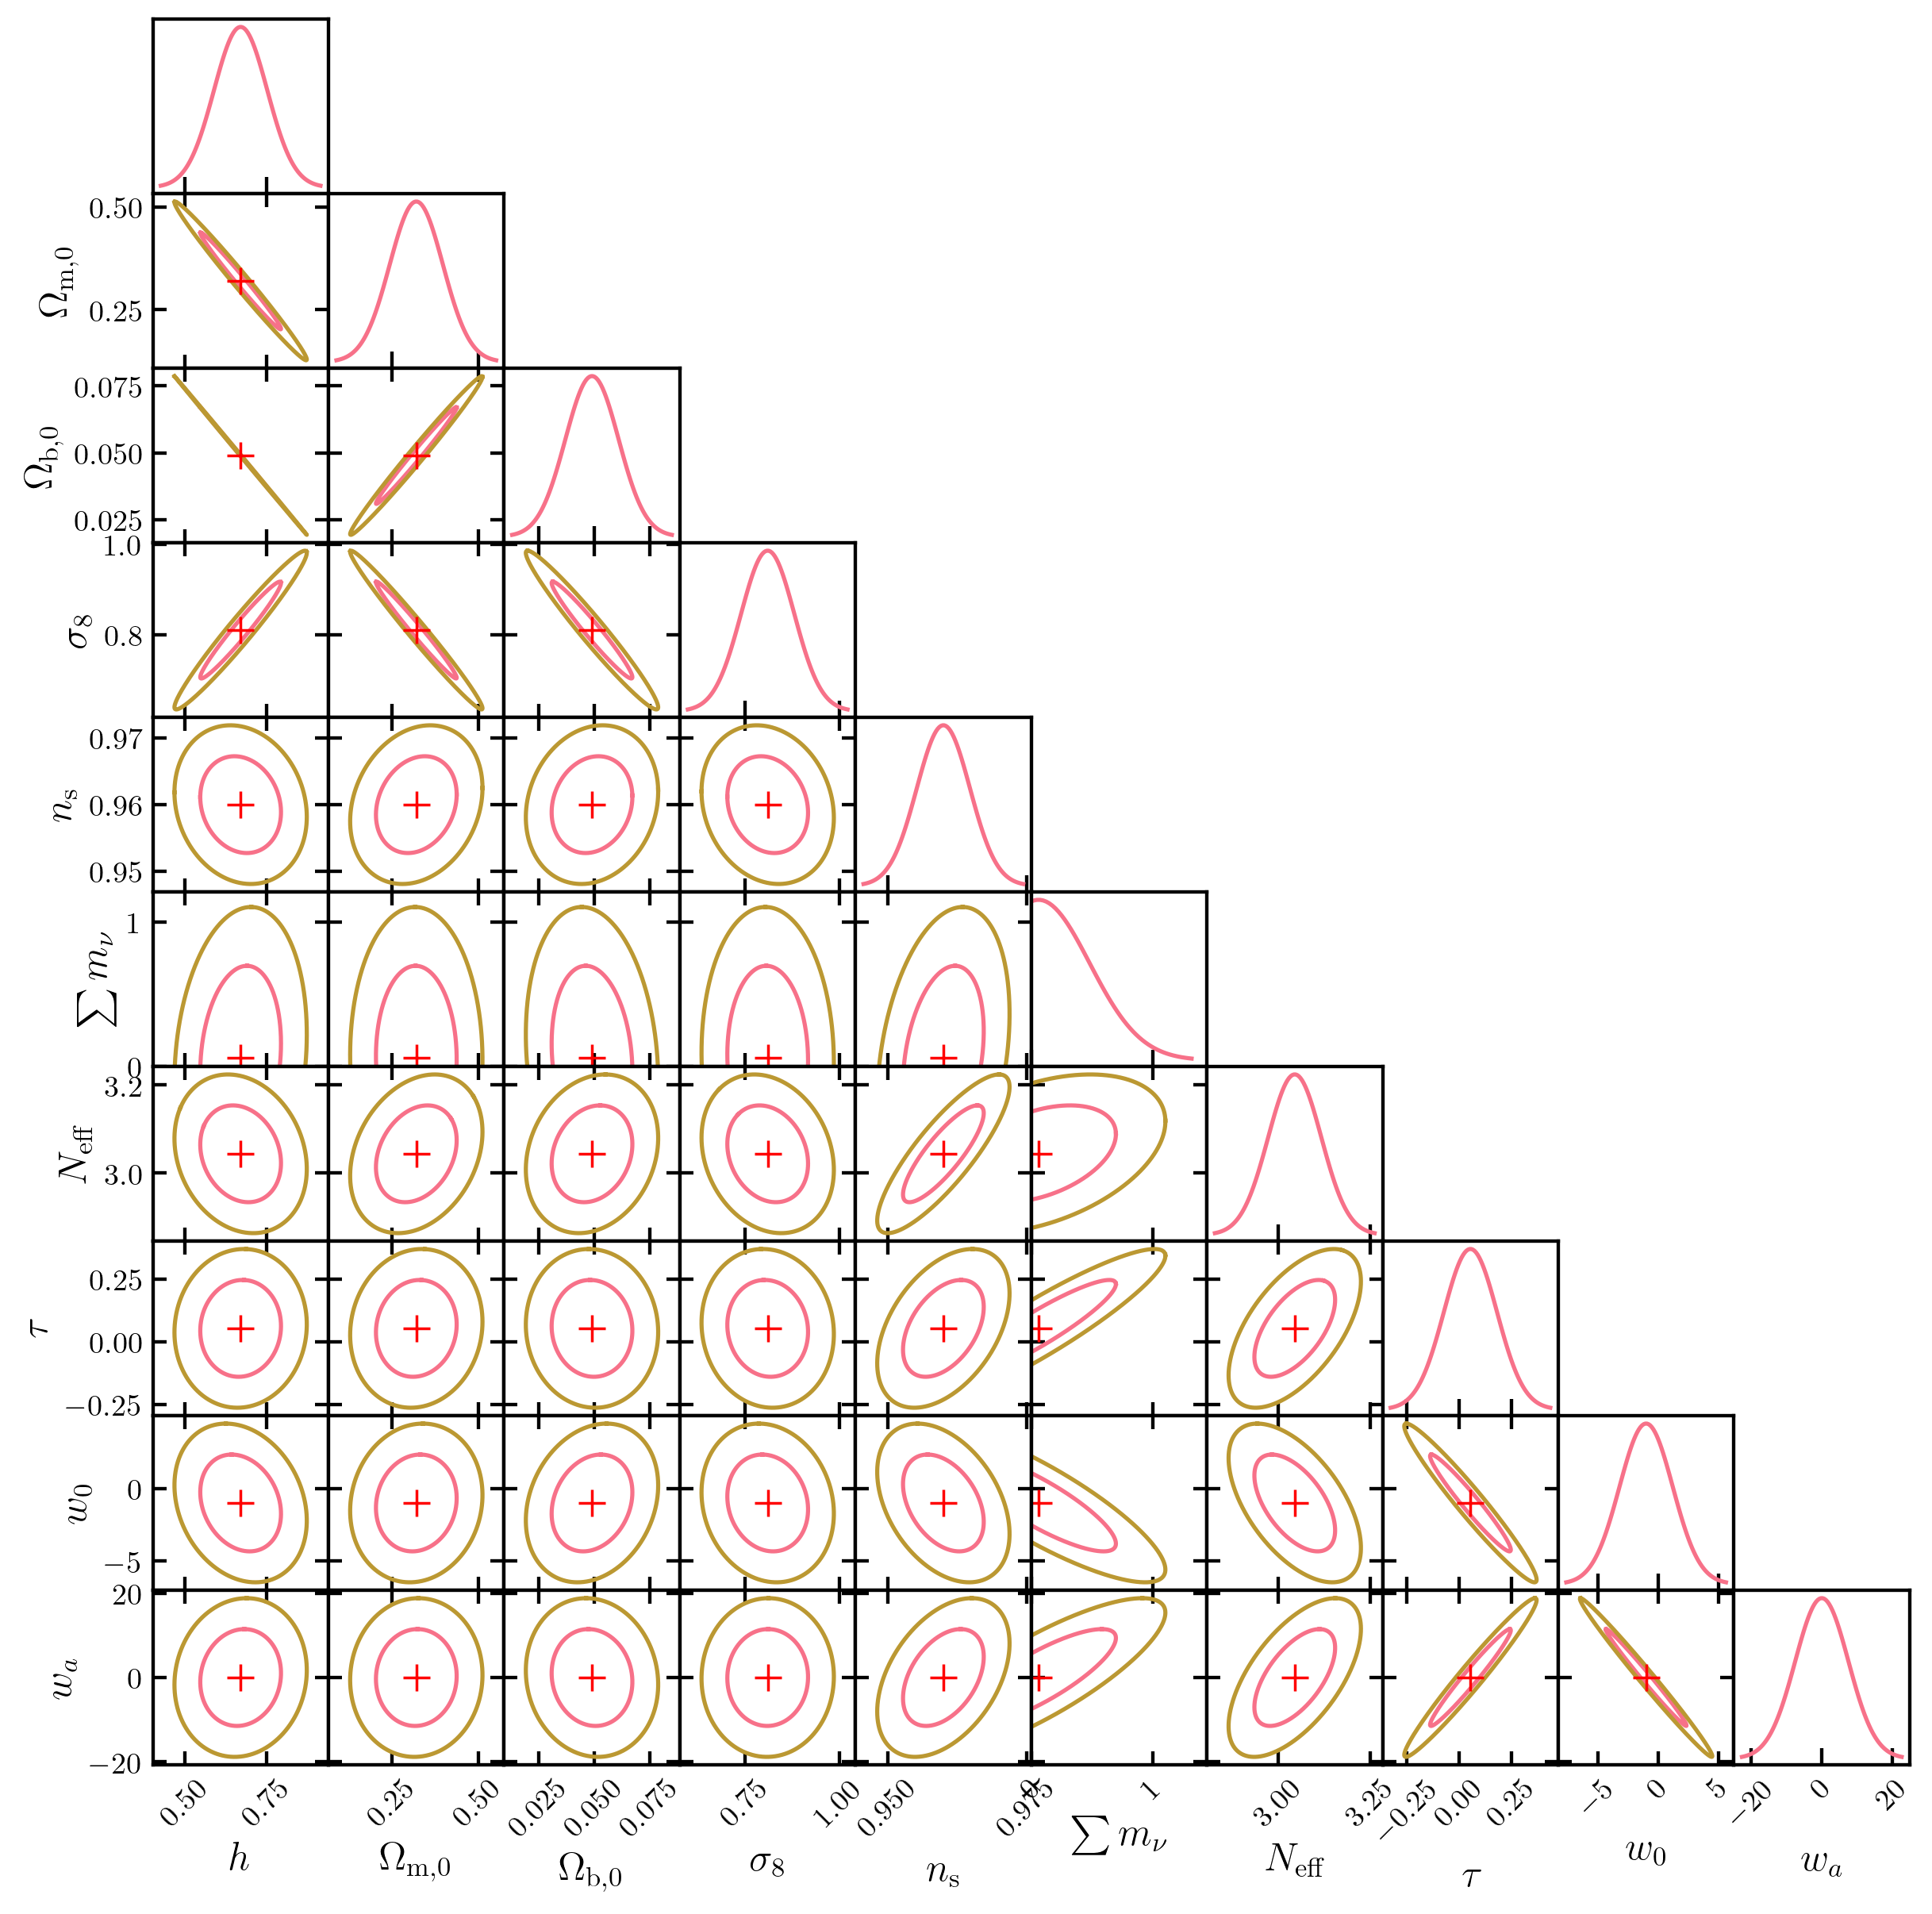

In [9]:
from starfish.plot import get_figure
fig=get_figure(cov.values,['h','omega_m0','omega_b0','sigma_8','n_s','m_nu','N_eff','tau','w0','wa'])

In [10]:
fisher.to_excel('highl_cmb-s4_fisher.xlsx')